# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [1]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology 

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

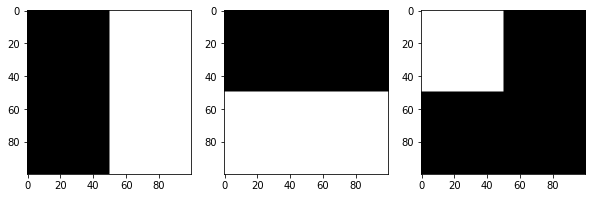

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


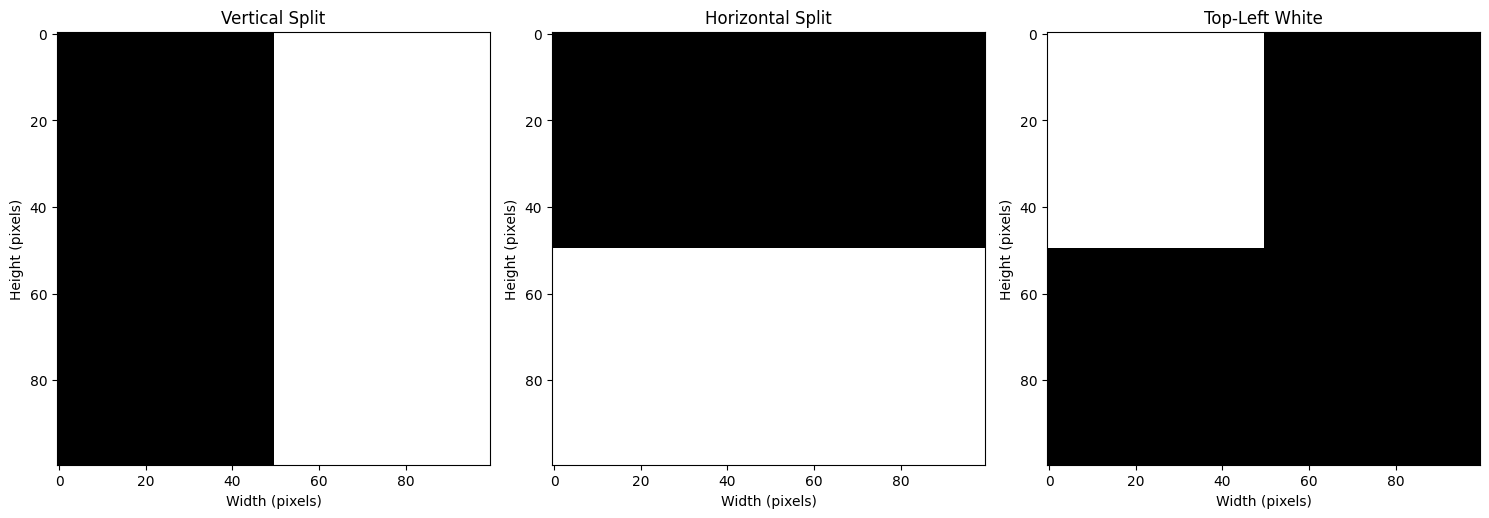

In [2]:
# solution
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create the first image (Vertical split: black on the left, white on the right)
# I am initializing a 100x100 black image using np.zeros (all pixel values set to 0)
image1 = np.zeros((100, 100))
# To make the right half of the image white, I assign a value of 1 to pixels in columns 50 onwards
image1[:, 50:] = 1

# Step 2: Create the second image (Horizontal split: black on top, white on bottom)
# Similarly, I start with a black image
image2 = np.zeros((100, 100))
# I make the bottom half white by assigning 1 to rows 50 onwards
image2[50:, :] = 1

# Step 3: Create the third image (Top-left quadrant white, rest black)
# Again, I initialize a black image
image3 = np.zeros((100, 100))
# I make the top-left quadrant white by assigning 1 to rows and columns within the first 50 pixels
image3[:50, :50] = 1

# Step 4: Visualize the images in a 1x3 subplot
# I use plt.subplots to create a grid of 1 row and 3 columns for the three images
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plotting the first image
ax[0].imshow(image1, cmap='gray')  # Display the image in grayscale
ax[0].set_title("Vertical Split")  # I add a descriptive title
ax[0].set_xlabel("Width (pixels)")  # Adding an axis label for width
ax[0].set_ylabel("Height (pixels)")  # Adding an axis label for height
ax[0].grid(False)  # I ensure the grid is off for clarity

# Plotting the second image
ax[1].imshow(image2, cmap='gray')
ax[1].set_title("Horizontal Split")
ax[1].set_xlabel("Width (pixels)")
ax[1].set_ylabel("Height (pixels)")
ax[1].grid(False)

# Plotting the third image
ax[2].imshow(image3, cmap='gray')
ax[2].set_title("Top-Left White")
ax[2].set_xlabel("Width (pixels)")
ax[2].set_ylabel("Height (pixels)")
ax[2].grid(False)

# Step 5: Adjust layout for better visualization
plt.tight_layout()  # I ensure the plots are properly spaced
plt.show()  # Finally, I display the plots



*   Use the above three images to create the following image

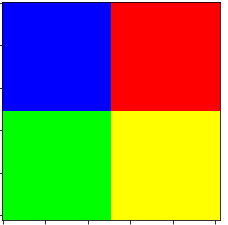
*Hint: Remember channels and color spaces*

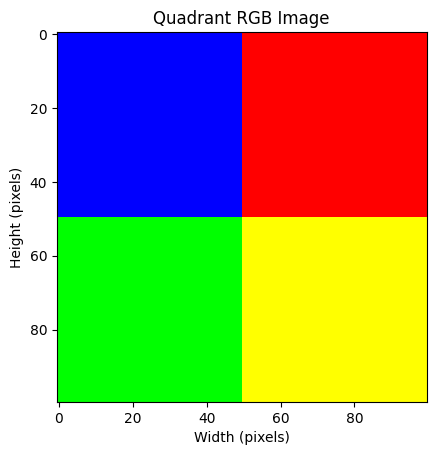

In [3]:
# solution
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Initialize a 100x100x3 array for the RGB image
# I am using 3 channels to represent RGB colors
image = np.zeros((100, 100, 3), dtype=np.float32)

# Step 2: Define the colors for each quadrant
# Top-left: Blue
image[:50, :50, 2] = 1  # Blue channel set to 1
# Top-right: Red
image[:50, 50:, 0] = 1  # Red channel set to 1
# Bottom-left: Green
image[50:, :50, 1] = 1  # Green channel set to 1
# Bottom-right: Yellow (Red + Green)
image[50:, 50:, 0] = 1  # Red channel set to 1
image[50:, 50:, 1] = 1  # Green channel set to 1

# Step 3: Visualize the image
# I use plt.imshow to display the image
plt.imshow(image)
plt.title("Quadrant RGB Image")  # I add a title for clarity
plt.xlabel("Width (pixels)")  # Label for the x-axis
plt.ylabel("Height (pixels)")  # Label for the y-axis
plt.show()



### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

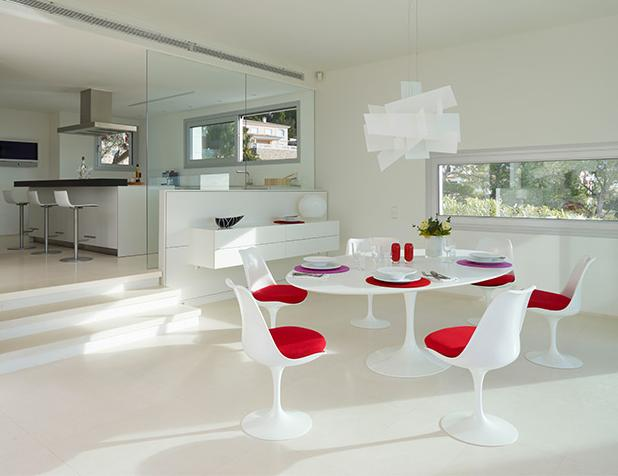

*   Extract individual channels and plot them using matplotlib subplot.



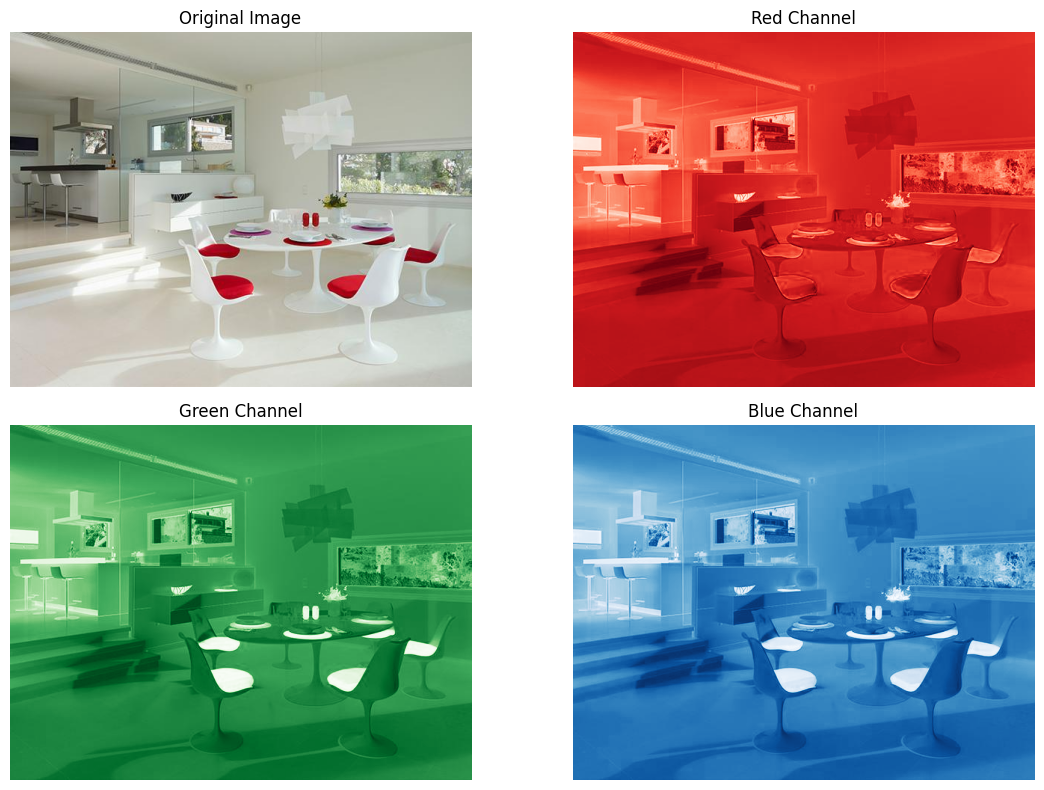

In [4]:
# solution
import matplotlib.pyplot as plt
from skimage import io

# Step 1: Read the image
# I load the image using skimage.io
image = io.imread('C:/Users/isabe/OneDrive/Документы/ironhack/LEaRNGIT/lab 29/lab-image-processing/images/sillas.jpg')

# Step 2: Extract individual color channels
# Separating the Red, Green, and Blue channels from the image
red_channel = image[:, :, 0]   # Red channel
green_channel = image[:, :, 1] # Green channel
blue_channel = image[:, :, 2]  # Blue channel

# Step 3: Plot the original image and individual channels
# I use subplots to display the original image alongside its color channels
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')  # Turn off axes for better visualization

# Red channel
plt.subplot(2, 2, 2)
plt.imshow(red_channel, cmap='Reds')
plt.title("Red Channel")
plt.axis('off')

# Green channel
plt.subplot(2, 2, 3)
plt.imshow(green_channel, cmap='Greens')
plt.title("Green Channel")
plt.axis('off')

# Blue channel
plt.subplot(2, 2, 4)
plt.imshow(blue_channel, cmap='Blues')
plt.title("Blue Channel")
plt.axis('off')

# Display the plots
plt.tight_layout()
plt.show()


*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

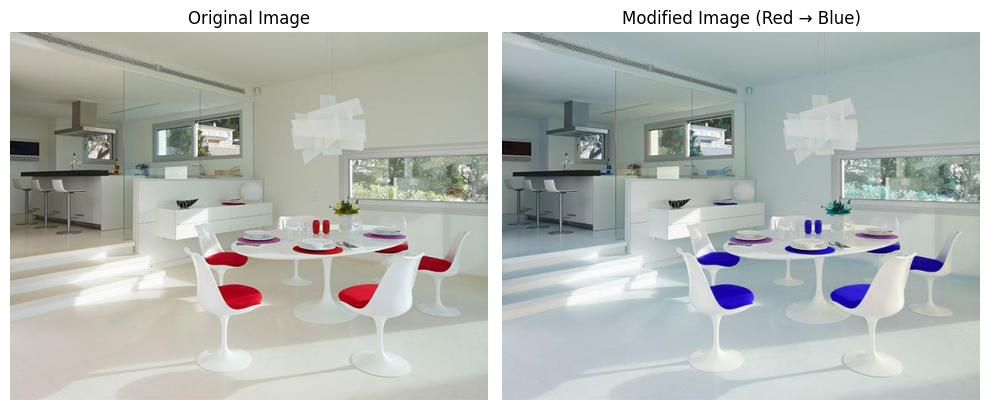

In [5]:
# solution
import matplotlib.pyplot as plt
from skimage import io

# Step 1: Load the original image
# I read the image using skimage.io
image = io.imread('C:/Users/isabe/OneDrive/Документы/ironhack/LEaRNGIT/lab 29/lab-image-processing/images/sillas.jpg')
# Step 2: Create a copy of the image and modify red channel to blue
# I make a copy to preserve the original image
modified_image = image.copy()

# Setting the red channel (index 0) to the values of the blue channel (index 2)
modified_image[:, :, 0] = image[:, :, 2]

# Setting the blue channel (index 2) to the values of the red channel (index 0)
modified_image[:, :, 2] = image[:, :, 0]

# Step 3: Visualize the original and modified images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# Modified image
plt.subplot(1, 2, 2)
plt.imshow(modified_image)
plt.title("Modified Image (Red → Blue)")
plt.axis('off')

# Display the plots
plt.tight_layout()
plt.show()



# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

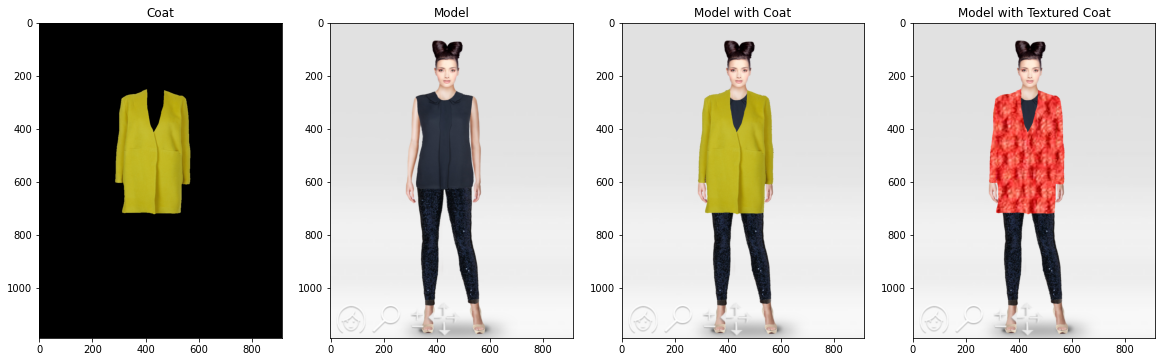

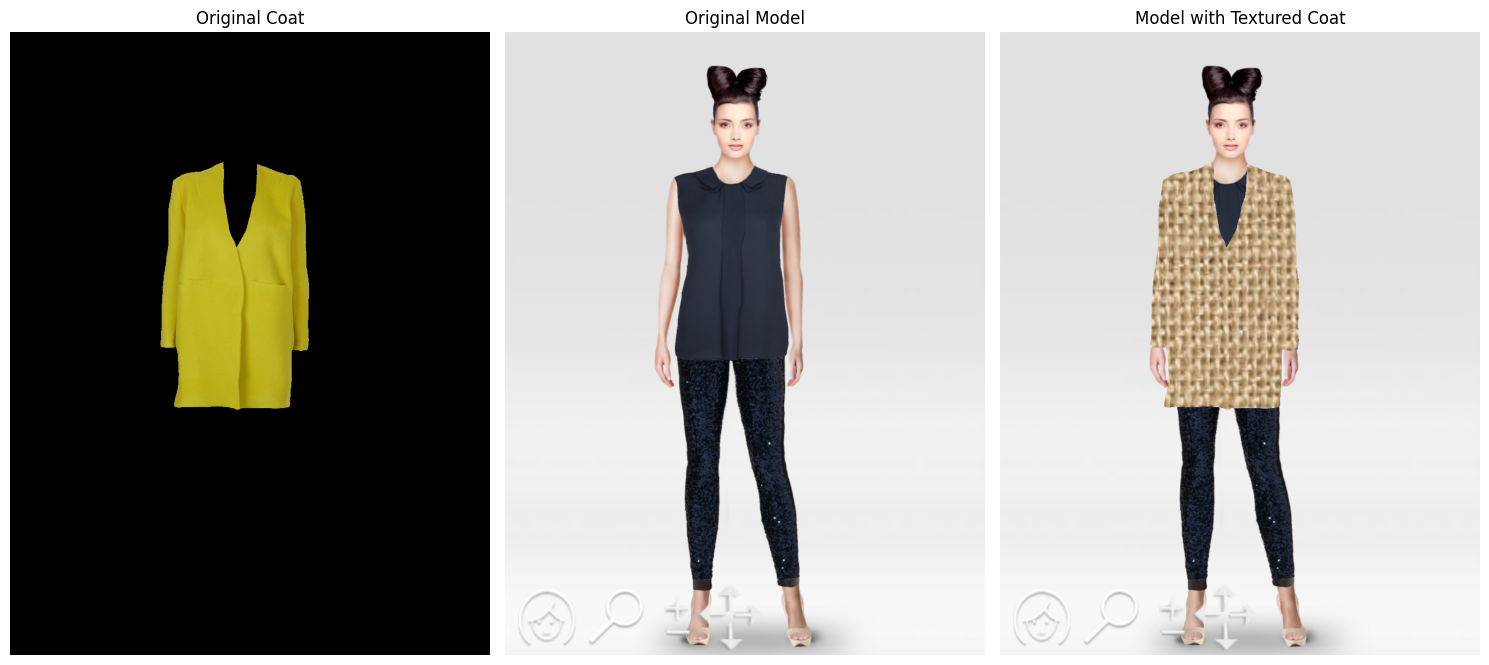

In [10]:
# solution
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the paths to the images
# I am specifying the paths to the model, coat, and texture images.
model_path = "./images/model.png"
coat_path = "./images/coat.png"
texture_path = "./images/texture3.jpg"

# Step 2: Load the images
# I use cv2.imread to load the images from their paths.
model = cv2.imread(model_path)
coat = cv2.imread(coat_path)
texture = cv2.imread(texture_path)

# Step 3: Ensure the images are loaded correctly
# I want to avoid errors, so I check if any image failed to load.
if model is None or coat is None or texture is None:
    raise FileNotFoundError("One or more images could not be loaded. Check the file paths.")

# Step 4: Create a binary mask from the coat
# To isolate the coat area, I first convert the coat image to grayscale.
coat_gray = cv2.cvtColor(coat, cv2.COLOR_BGR2GRAY)

# Next, I create a binary mask where the coat area is white, and the rest is black.
_, mask = cv2.threshold(coat_gray, 1, 255, cv2.THRESH_BINARY)

# Step 5: Resize the texture to match the coat dimensions
# Since the texture image might be a different size, I resize it to match the coat's dimensions.
texture_resized = cv2.resize(texture, (coat.shape[1], coat.shape[0]))

# Step 6: Apply the texture to the coat area
# Using the binary mask, I apply the texture only to the coat area.
textured_coat = cv2.bitwise_and(texture_resized, texture_resized, mask=mask)

# Step 7: Remove the coat area from the model image
# To blend the textured coat with the model, I first remove the coat area from the model.
inverse_mask = cv2.bitwise_not(mask)
model_background = cv2.bitwise_and(model, model, mask=inverse_mask)

# Step 8: Combine the textured coat with the model
# I combine the textured coat with the remaining parts of the model to create the final image.
final_result = cv2.add(model_background, textured_coat)

# Step 9: Visualize the results
# I use Matplotlib to display the original coat, the original model, and the final result side by side.
plt.figure(figsize=(15, 10))

# Display the original coat image
plt.subplot(1, 3, 1)
plt.title("Original Coat")
plt.imshow(cv2.cvtColor(coat, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Display the original model image
plt.subplot(1, 3, 2)
plt.title("Original Model")
plt.imshow(cv2.cvtColor(model, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Display the final image with the textured coat applied
plt.subplot(1, 3, 3)
plt.title("Model with Textured Coat")
plt.imshow(cv2.cvtColor(final_result, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()



# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




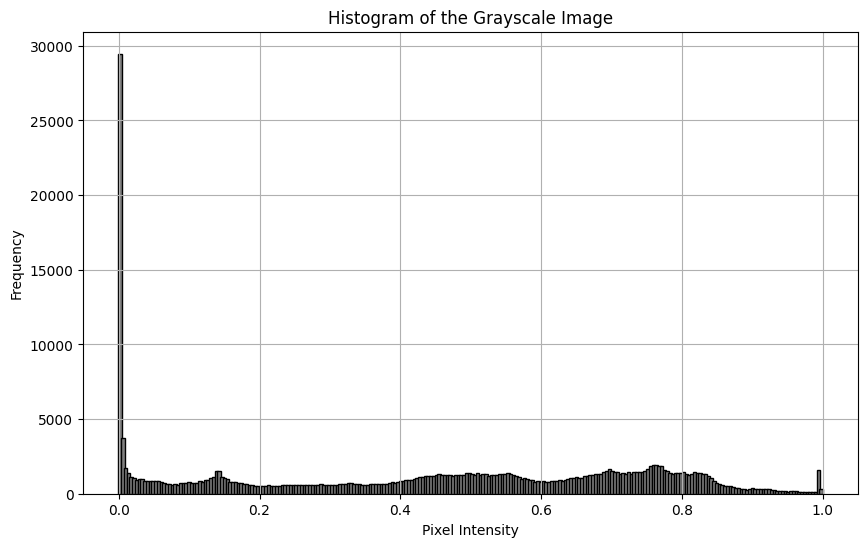

In [11]:
# solution
# solution
import matplotlib.pyplot as plt
from skimage import data, color, exposure

image_astronaut = data.astronaut()

image_gray = color.rgb2gray(image_astronaut)

hist, bin_edges = exposure.histogram(image_gray)

plt.figure(figsize=(10, 6))
plt.title('Histogram of the Grayscale Image')
plt.bar(bin_edges, hist, width=0.005, color='gray', edgecolor='black')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

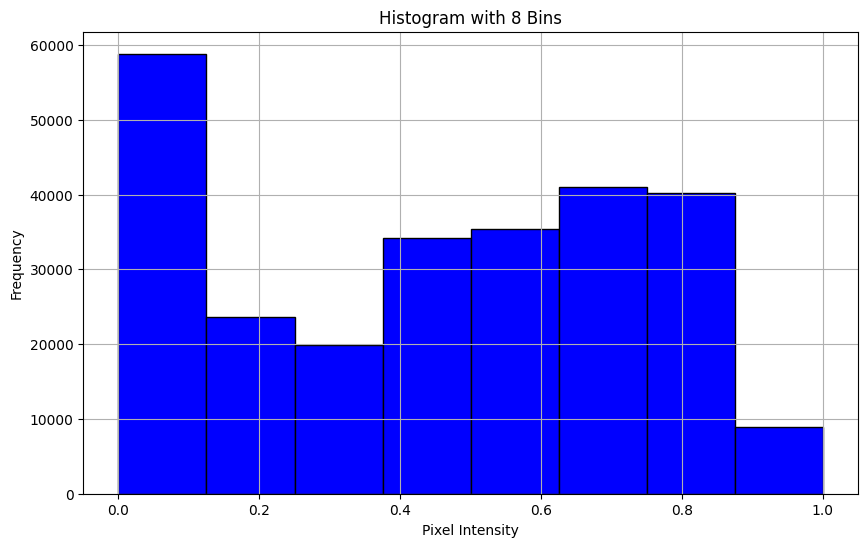

In [12]:
# solution
bin_count = 8
hist_8bins, bin_edges_8bins = exposure.histogram(image_gray, nbins=bin_count)

plt.figure(figsize=(10, 6))
plt.title(f'Histogram with {bin_count} Bins')
plt.bar(bin_edges_8bins, hist_8bins, width=(bin_edges_8bins[1] - bin_edges_8bins[0]), color='blue', edgecolor='black')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()




*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?

